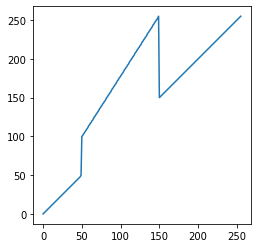

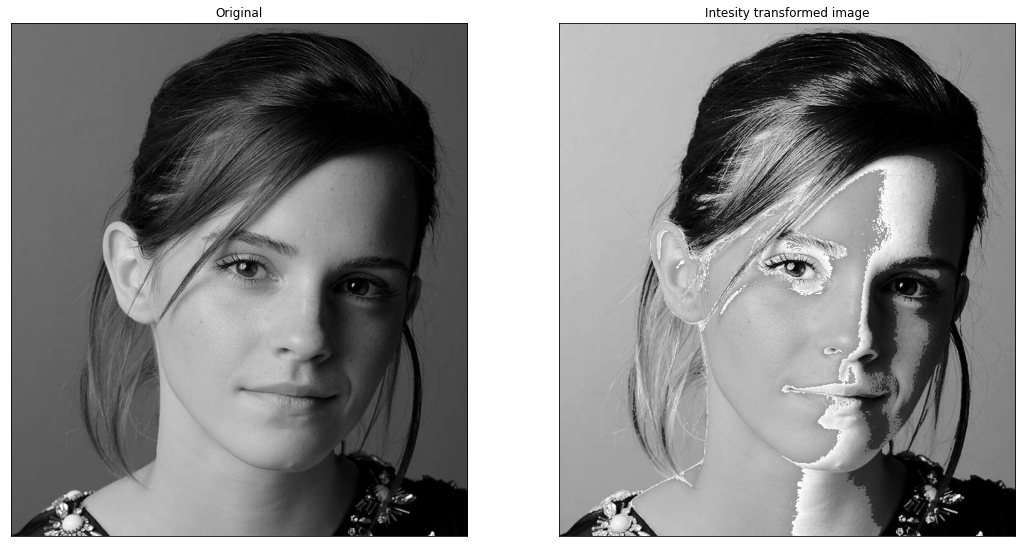

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert im is not None

t1= np.linspace (0,50,50)
t2= np.linspace (50,100,0)
t3= np.linspace (100,255, 100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) ==256

result= cv.LUT(im,t)

fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Intesity transformed image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()


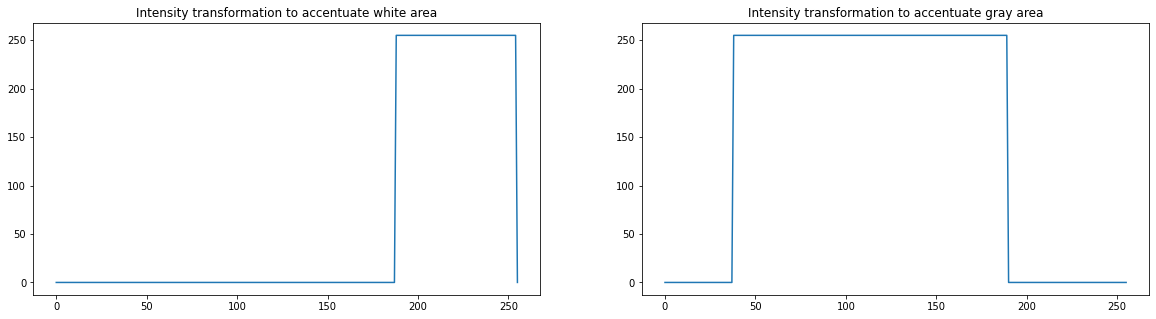

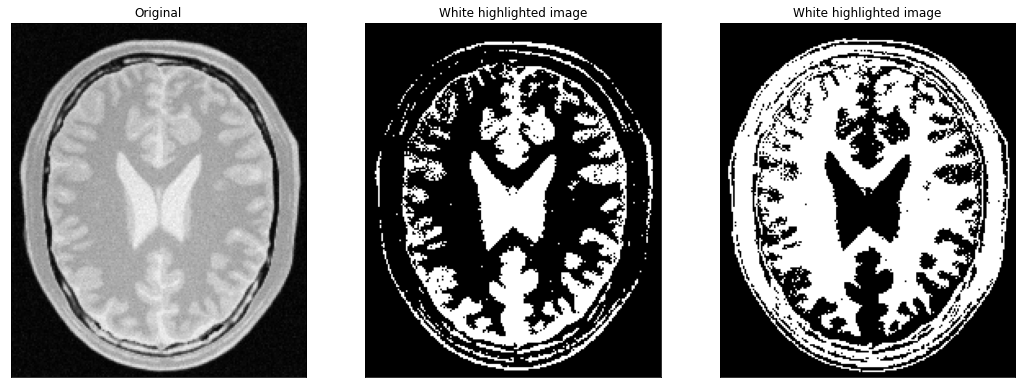

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None

# t1=np.linspace(0,0,209)
# t2=np.linspace(255,256,47) #white only

t1=np.linspace(0,0,188)
t2=np.linspace(255,256,68) #white and light gray both

t3=np.linspace(0,0,38)
t4=np.linspace(255,256,153)
t5=np.linspace(0,0,65)

# t1= np.linspace (0,30,30)
# t2= np.linspace (30,100,0)
# t3= np.linspace (100,255, 120)
# t4=np.linspace(255,150,0)
# t5=np.linspace(150,255,106)
t_gray=np.concatenate((t3,t4,t5), axis =0).astype(np.uint8)
t_white= np.concatenate((t1,t2), axis =0).astype(np.uint8)
fig,axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(t_white)
axs[0].set_title("Intensity transformation to accentuate white area")

axs[1].plot(t_gray)
axs[1].set_title("Intensity transformation to accentuate gray area")

#axs.set_aspect('equal')
assert len(t_white) ==256
assert len(t_gray) ==256

white_result= cv.LUT(im,t_white)
gray_result= cv.LUT(im,t_gray)

fig,axes = plt.subplots(1,3,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( white_result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "White highlighted image" )

axes [2] . imshow( gray_result , cmap= "gray",vmin=0, vmax=255)
axes [2] . set_title( "White highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

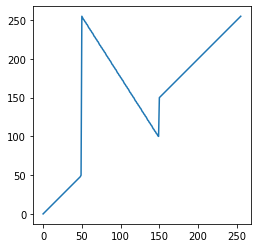

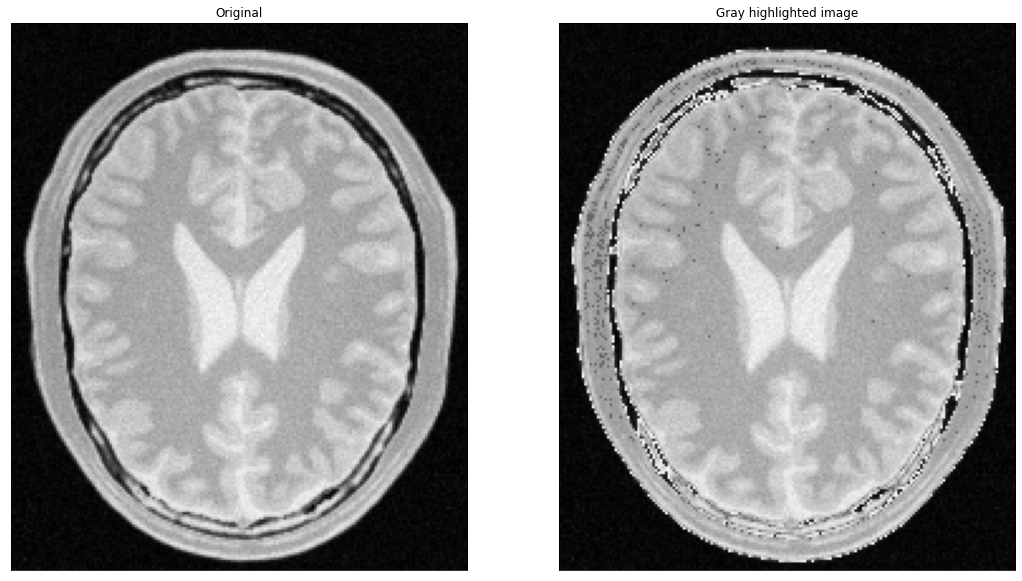

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert im is not None


t1= np.linspace (0,50,50)
t2= np.linspace (50,255,0)
t3= np.linspace (255,100, 100)
t4=np.linspace(100,150,0)
t5=np.linspace(150,255,106)

t= np.concatenate((t1,t2,t3,t4,t5), axis =0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) ==256

result= cv.LUT(im,t)
fig,axes = plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,18))
axes[0].imshow(im, cmap="gray",vmin=0, vmax=255)
axes[0] . set_title( "Original")

axes [1] . imshow( result , cmap= "gray",vmin=0, vmax=255)
axes [1] . set_title( "Gray highlighted image" )

for i in range(2):
    axes [i] . set_xticks ([]) , axes [i] . set_yticks ([])
plt . show()

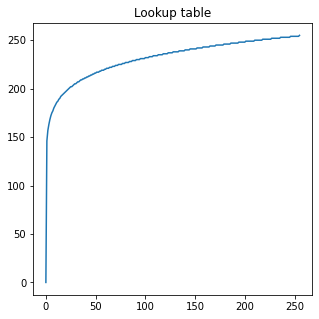

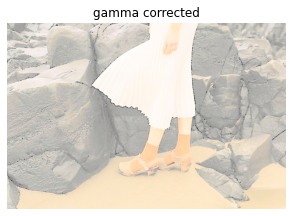

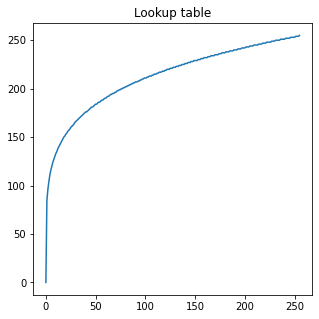

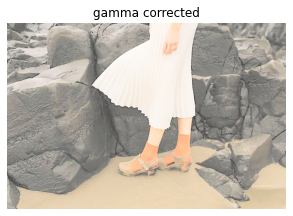

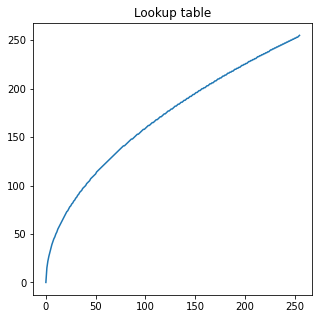

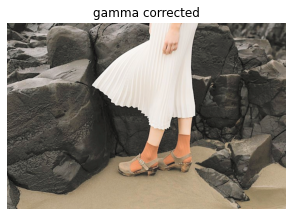

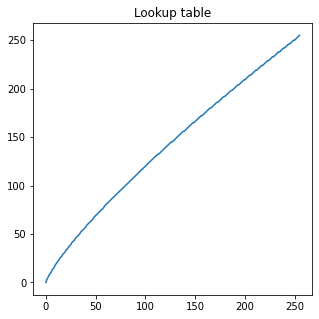

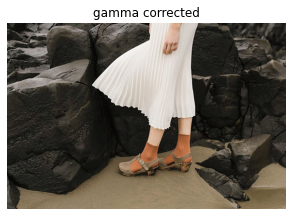

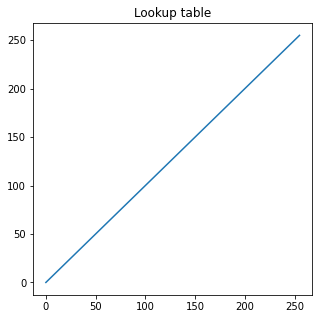

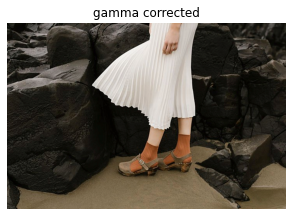

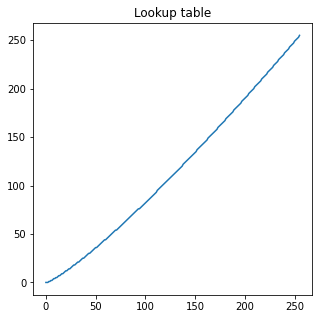

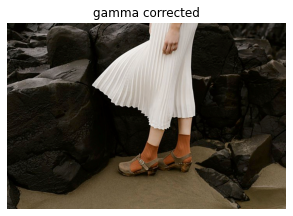

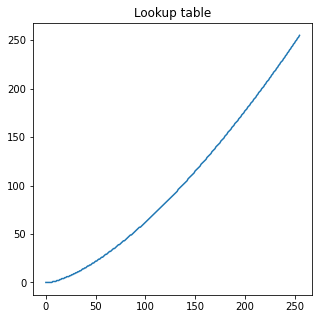

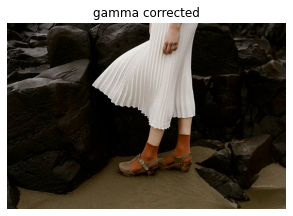

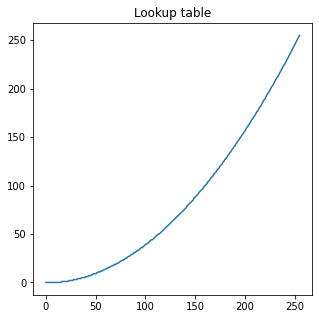

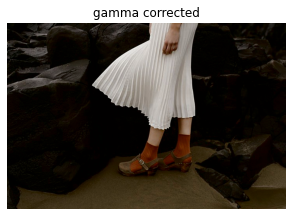

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'highlights_and_shadows.jpg')
assert im is not None

# fig,ax = plt.subplots(figsize=(10,10))
    
# GH=cv.cvtColor(im,cv.COLOR_BGR2RGB)    
# ax.imshow(GH,vmin=0, vmax=255)
# ax . set_title( "gamma corrected")
    
gamma = [0.1,0.2,0.5,0.8,1,1.2,1.5,2]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range (0,256)]).astype(np.uint8)
    GH=cv.cvtColor(im,cv.COLOR_BGR2LAB) 
    (L, a, b) = cv.split(GH)
    g1=cv.LUT(L,t)

    gamma_corrected = cv.merge([g1,a,b])
    g=cv.cvtColor(gamma_corrected,cv.COLOR_Lab2RGB)
    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(t)
    ax . set_title( "Lookup table")

    fig,ax = plt.subplots(figsize=(5,5))
    
    ax.imshow(g,vmin=0, vmax=255)
    ax . set_title( "gamma corrected")
    
    plt.axis('off')

Text(0.5, 1.0, 'Histogram equalize image')

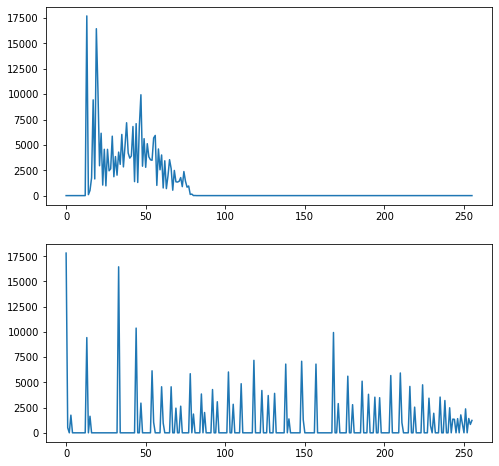

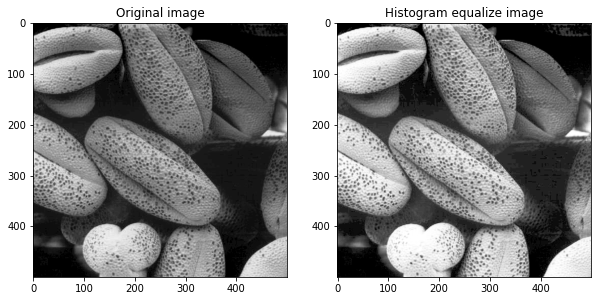

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert im is not None

hist_im = cv.calcHist([im], [0], None, [256], [0,256])
g = cv.equalizeHist(im)
hist_g = cv.calcHist([g], [0], None, [256], [0,256])

fig, ax = plt.subplots(2,1,figsize= (8,8))
ax[0].plot(hist_im)
ax[1].plot(hist_g)

fig = plt.subplots(2,1,figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(im,"gray")
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(g,"gray")
plt.title("Histogram equalize image")

270
480
540 0
540 1
540 2
540 3
540 4
540 5
540 6
540 7
540 8
540 9
540 10
540 11
540 12
540 13
540 14
540 15
540 16
540 17
540 18
540 19
540 20
540 21
540 22
540 23
540 24
540 25
540 26
540 27
540 28
540 29
540 30
540 31
540 32
540 33
540 34
540 35
540 36
540 37
540 38
540 39
540 40
540 41
540 42
540 43
540 44
540 45
540 46
540 47
540 48
540 49
540 50
540 51
540 52
540 53
540 54
540 55
540 56
540 57
540 58
540 59
540 60
540 61
540 62
540 63
540 64
540 65
540 66
540 67
540 68
540 69
540 70
540 71
540 72
540 73
540 74
540 75
540 76
540 77
540 78
540 79
540 80
540 81
540 82
540 83
540 84
540 85
540 86
540 87
540 88
540 89
540 90
540 91
540 92
540 93
540 94
540 95
540 96
540 97
540 98
540 99
540 100
540 101
540 102
540 103
540 104
540 105
540 106
540 107
540 108
540 109
540 110
540 111
540 112
540 113
540 114
540 115
540 116
540 117
540 118
540 119
540 120
540 121
540 122
540 123
540 124
540 125
540 126
540 127
540 128
540 129
540 130
540 131
540 132
540 133
540 134
540 135
540 136
540 13

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

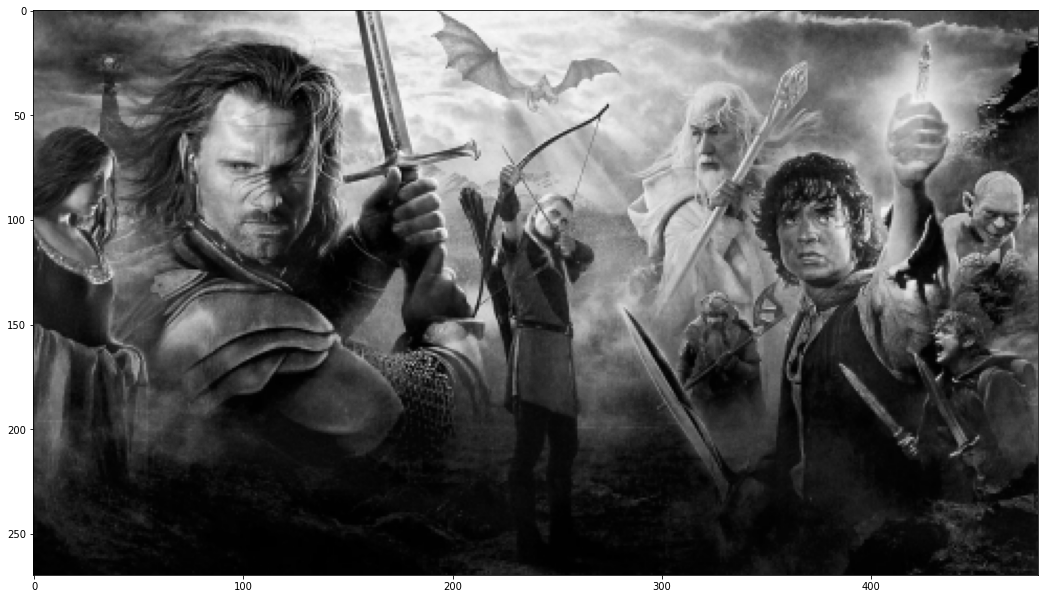

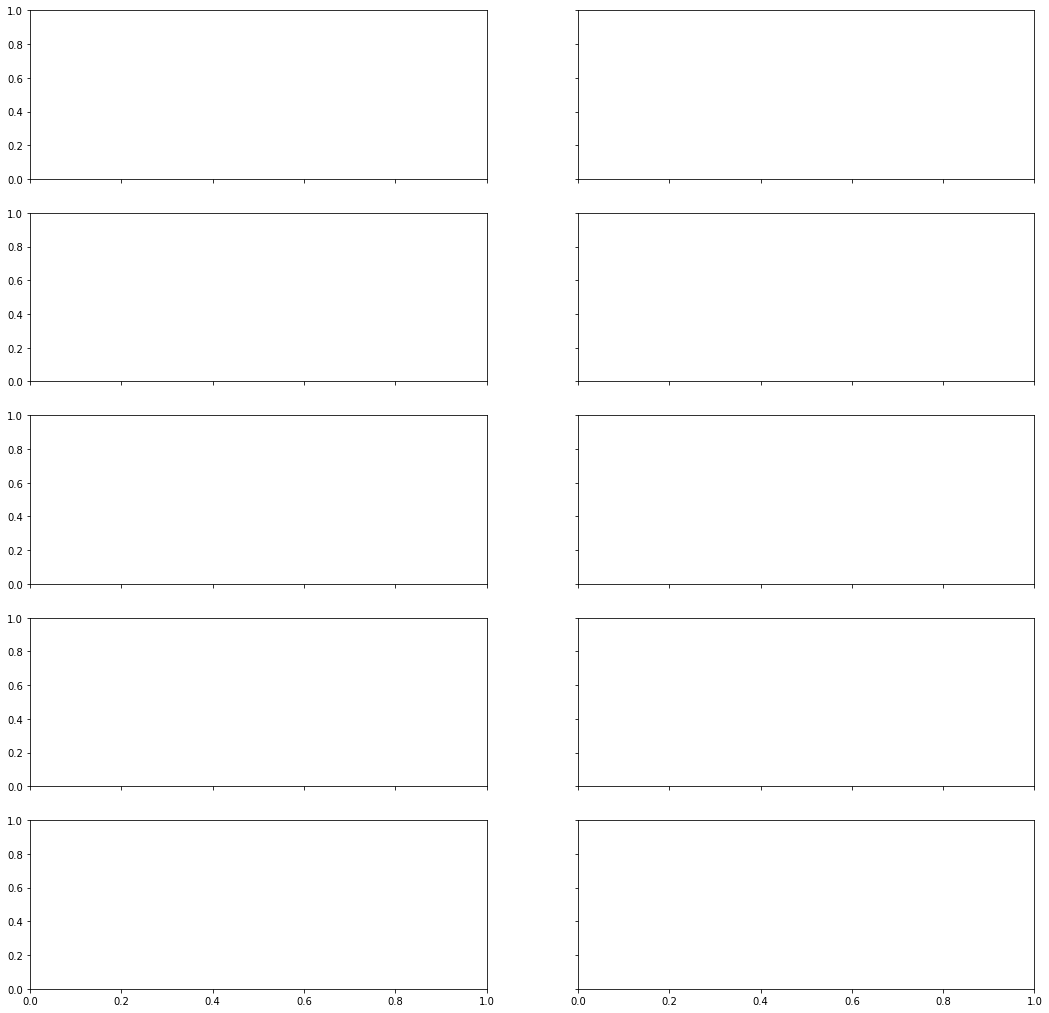

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im=cv.imread(r'a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
assert im is not None
print(im.shape[0])
print(im.shape[1])
fig,ax = plt.subplots(1,1,sharex="all",sharey="all",figsize=(18,18))
ax.imshow(im,cmap="gray",vmin=0,vmax=255)

fig,axes = plt.subplots(5,2,sharex="all",sharey="all",figsize=(18,18))

#scale = [1:10]
for i in range(2,3):
    rows = int(i*im.shape[0])
    columns = int(i*im.shape[1])

    zoomed = np.zeros((rows,columns),dtype=im.dtype)

    for p in range(0,rows+1):
        for q in range(0,columns):
            #print(p/i, q/i)
            try:
                zoomed[p,q]=im[int(p/i),int(q/i)]
            except IndexError:
                print(p,q)
    axes[i].imshow(zoomed, cmap="gray",vmin=0, vmax=255)
    axes[i] . set_title( "Original")
    

